In [16]:
import torch

### Tensor

In [9]:
# create a 2D default tensor

In [6]:
z = torch.zeros(5,3)
print(z)
print(z.type)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
<built-in method type of Tensor object at 0x7f83b0a86360>


In [7]:
# datatype is 32-bit floating point numbers

In [8]:
i = torch.ones((5,3),dtype = torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [10]:
# initialize learning weights randomly

In [11]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print(r1)

r2 = torch.rand(2,2)
print(r2)

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])


In [12]:
# tensors of similar shapes may be added, multiplied

In [13]:
ones = torch.ones(2,3)
print(ones)
twos = torch.ones(2,3)*2
print(twos)
threes = ones + twos
print(threes)
print(threes.shape) # this has the same dimension as input tensors



tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [14]:
# Basic operation of tensors

In [15]:
r = torch.rand(2,2) - 0.5*2 # values between -1 and 1
print(r)

print(torch.abs(r))

print(torch.asin(r)) # inverse sine of r

print(torch.det(r)) # determinant
print(torch.svd(r)) # singular value decomposition

print(torch.std_mean(r)) # std mean

tensor([[-0.7838, -0.0073],
        [-0.5872, -0.4062]])
tensor([[0.7838, 0.0073],
        [0.5872, 0.4062]])
tensor([[-0.9007, -0.0073],
        [-0.6277, -0.4183]])
tensor(0.3141)
torch.return_types.svd(
U=tensor([[-0.7457, -0.6663],
        [-0.6663,  0.7457]]),
S=tensor([1.0140, 0.3097]),
V=tensor([[ 0.9622,  0.2723],
        [ 0.2723, -0.9622]]))
(tensor(0.3307), tensor(-0.4461))


### Autograd

In [17]:
# Simple recurrent network
x = torch.randn(1,10)
prev_h = torch.randn(1,20)
W_h = torch.randn(20,20)
W_x = torch.randn(20,10)


In [18]:
# x is the input, h is the hidden state

In [19]:
# use matrix multiplication to both

In [23]:
i2h = torch.mm(W_x,x.t())
h2h = torch.mm(W_h,prev_h.t())
# add two together
next_h = i2h + h2h
# pass the result to an activation function, here tanh
next_h = next_h.tanh()
# the difference between correct output and actual condition
loss = next_h.sum()
loss.backward()
# use backward to trace back the computation

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [22]:
# How to we adjust the way to reduce loss, it's the point

### Example

In [25]:
import torch.nn as nn # for torch.nn module, the parent obkect for pytorch models
import torch.nn.functional as F # for the activation function

In [27]:
class LeNet(nn.Module):
    # used for initialization like layers...
    def __init__(self):
        super(LeNet, self).__init__()
    # used for computation
    def forward(self,x):
        return x
    def num_flat_features(self,x):
        return num_features

In [28]:
net = LeNet()
print(net)


LeNet()


In [32]:
input = torch.rand(1,1,32,32)
print(input)
print(input.shape)
output = net(input)
print(output)
print(output.shape)

tensor([[[[0.1676, 0.3847, 0.8932,  ..., 0.0340, 0.2117, 0.6563],
          [0.5107, 0.1623, 0.8833,  ..., 0.2558, 0.3819, 0.8492],
          [0.6974, 0.9979, 0.1442,  ..., 0.9041, 0.9339, 0.8539],
          ...,
          [0.3443, 0.3369, 0.6493,  ..., 0.3851, 0.3320, 0.1342],
          [0.0780, 0.0677, 0.6386,  ..., 0.7277, 0.2554, 0.7567],
          [0.7939, 0.5193, 0.6333,  ..., 0.3206, 0.0321, 0.5643]]]])
torch.Size([1, 1, 32, 32])
tensor([[[[0.1676, 0.3847, 0.8932,  ..., 0.0340, 0.2117, 0.6563],
          [0.5107, 0.1623, 0.8833,  ..., 0.2558, 0.3819, 0.8492],
          [0.6974, 0.9979, 0.1442,  ..., 0.9041, 0.9339, 0.8539],
          ...,
          [0.3443, 0.3369, 0.6493,  ..., 0.3851, 0.3320, 0.1342],
          [0.0780, 0.0677, 0.6386,  ..., 0.7277, 0.2554, 0.7567],
          [0.7939, 0.5193, 0.6333,  ..., 0.3206, 0.0321, 0.5643]]]])
torch.Size([1, 1, 32, 32])


In [33]:
# it's original now, we need to feed a bunch of data to make it rn

### Dataset and Dataloader

In [34]:
import torchvision
import torchvision.transforms as transforms

/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")


In [35]:
# introduction to data loader

In [46]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

two classic transformations: transforms.ToTensor(), transforms.Normalize()

In [52]:
# not necessary
trainset = torchvision.datasets.CIFAR10(root = './data',train = True, download = True, transform = transform)

Files already downloaded and verified


In [53]:
# necessary
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers= 2)

The <mark>DataLoader</mark> knows nothing about the data, but orgainizes the input tensors served by the Dataset into batches with the parameters you specify.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Image are represented as <mark>[batch_size(if not 0),channels, height, width]</mark>.

Therefore a perturbation is applied here

/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")
/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libj

 bird  ship   car   dog


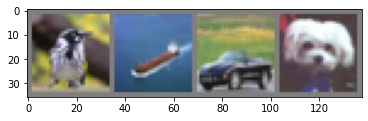

In [51]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [69]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5) #[in_channel, out_channel, kernel_size]
        self.pool = nn.MaxPool2d(2,2) #[kernel_size(2*2 square here), stride]
        self.conv2 = nn.Conv2d(6,10,5)
        self.fc1 = nn.Linear(10*5*5,120) #[in_features, out_features]
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self,x):
        # RELU: activation function
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # change x's size here, then apply another transform function
        # flatten
        x = x.view(-1,10*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [60]:
criterion =nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001, momentum = 0.9)

In [61]:
# The optimizer is what drives the learning, we use stochastic gradient descent(SGD) now.

In [62]:
# we pass net.parameters(), which is a collection of all the learning weights in the model

In [70]:
for epoch in range(5) :
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        # it's important to prevent gradient from accumulating
        optimizer.zero_grad()
        
        # forward, backward then optimize
        # new model
        outputs = net(inputs)
        # new loss
        loss = criterion(outputs, labels)
        loss.backward()
        # it's an update function, which creates a single optimization step
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999: 
            print('[%d,%5d] loss : %.3f' % (epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')

/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")
/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libj

[1, 2000] loss : 2.304
[1, 4000] loss : 2.304
[1, 6000] loss : 2.305
[1, 8000] loss : 2.305
[1,10000] loss : 2.305
[1,12000] loss : 2.307


/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")
/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libj

[2, 2000] loss : 2.305
[2, 4000] loss : 2.305
[2, 6000] loss : 2.305
[2, 8000] loss : 2.306
[2,10000] loss : 2.305
[2,12000] loss : 2.304


/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/sallyr/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")


OSError: [Errno 23] Too many open files in system

In [74]:
# check model on test set with another testloader on a testset(split before)

In [72]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy is: %d %%' % (100 * correct / total))

NameError: name 'testloader' is not defined